# Assignment 4 - Unsupervised Learning and More Supervised Learning

## *Yifei Wang*
Netid:  *yw323*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1

### [35 points] Clustering

Clustering can be used to determine structure, assign group membership, and representing data through compression. Here you'll dive deeply into clustering exploring the impact of a number of classifiers on 

**(a)** Implement your own k-means algorithm. Demonstrate the efficacy of your algorithm on the `blobs` dataset from `scikit-learn` with 2 and 5 cluster centers. For each implementation rerun the k-means algorithm for values of k from 1 to 10 and for each plot the "elbow curve" where you plot the sum of square error. For each case, where is the elbow in the curve? Explain why.

**(b)** Briefly explain in 1-2 sentences each (and at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering

**(c)** For each of the clustering algorithms in (b) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance. Plot the final result as a 4-by-5 subplot showing the performance of each method on each dataset. Which methods work best/worst on each dataset and why?
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

**ANSWER**

**(a) Implement your own k-means algorithm. Demonstrate the efficacy of your algorithm on the `blobs` dataset from `scikit-learn` with 2 and 5 cluster centers. For each implementation rerun the k-means algorithm for values of k from 1 to 10 and for each plot the "elbow curve" where you plot the sum of square error. For each case, where is the elbow in the curve? Explain why.**

In [2]:
class kmeans:
    import numpy as np
    
    def __init__(self, k_clusters=5, random_state=None, tol=1e-4, metric="l2"):
        self.k_clusters = k_clusters
        self.random_state = random_state
        self.tol = tol
        self.metric = metric
    
    def fit(self, X):
        assert X.ndim == 2, "Wrong Input Format"
        
        # Initiate
        n, p = X.shape
        if X.shape[0] < self.k_clusters:
            print("Too much clusters.")
            self.k_clusters = X.shape[0]
        if self.random_state != None:
            np.random.seed(self.random_state)
        self.c = X[np.random.choice(n, self.k_clusters, replace=False)]
        self.labels = np.zeros(X.shape[0], dtype=int) - 1
        diff = 1
        
        # Loop for Updating Centroid
        while self.tol < diff:
            self.labels = self.cal_labels(X)
            next_centroid = self.cal_centroid(X)
            diff = np.max(np.linalg.norm(next_centroid - self.c, axis=1))
            self.c = next_centroid
        
        return self
    
    def cal_labels(self, X):
        labels = np.zeros(X.shape[0], dtype=int)
        
        if self.metric == "l2":
            for i, point in enumerate(X):
                labels[i] = np.argmin(np.linalg.norm(self.c - point, axis=1))
            return labels
        '''
        elif metric == "l1" :
            for i, point in enumerate(X):
                labels[i] = np.argmin(np.linalg.norm(self.c - point, ord=1, axis=1))
            return labels
        '''
    
    def cal_centroid(self, X):
        centroid = np.zeros_like(self.c)
        
        if self.metric == "l2":
            for i in range(centroid.shape[0]):
                centroid[i] = np.mean(X[np.where(self.labels == i)], axis=0)
            return centroid
        
    def get_inertia(self, X):
        inertia_list = np.zeros(X.shape[0])
        if self.metric == "l2":
            for i, point in enumerate(X):
                inertia_list[i] = np.linalg.norm(point - self.c[self.labels[i]])
            return np.sum(inertia_list ** 2)

In [3]:
def make_plot(data, labels, figsize=(10,10), title=None, xlab=None, ylab=None, legend=True):
    assert data.shape[0] == len(labels), "Wrong Input Format"
    plt.figure(figsize=figsize)
    for i in np.unique(labels):
        plt.scatter(data[np.where(labels == i), 0], data[np.where(labels == i), 1], cmap="tab20", label=i)
    if legend:
        plt.legend()
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

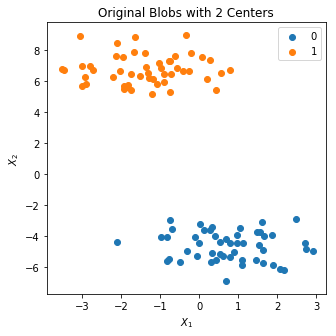

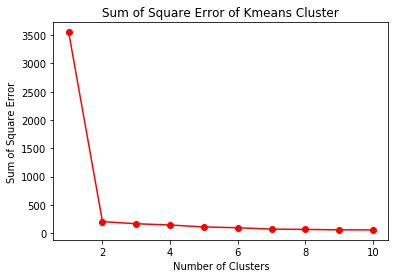

In [4]:
from sklearn.datasets import make_blobs

# 2 centers
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=100)
make_plot(X, y, figsize=(5, 5), title="Original Blobs with 2 Centers", xlab="$X_1$", ylab="$X_2$")

SSE = []
for k in range(1, 11):
    kmean = kmeans(k_clusters=k, random_state=0).fit(X)
    SSE.append(kmean.get_inertia(X))
plt.plot(np.arange(1, 11), SSE, '-or')
plt.title("Sum of Square Error of Kmeans Cluster")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Square Error")
plt.show()

For 2 centers, the elbow appears to be at $k=2$, because the slope (the decreasing speed of SSE) of this curve at this point is dramatically diminished. That is, the drop of the SSE from $k=1$ to $k=2$ is huge but the drop of it from $k=2$ to $k=3$ is small, and the drop stays almost constant when $k$ keep getting larger.

We could see from the plot of the original data that these data for this seed is perfectly seperable for classification into 2 blobs, and the distance between the centroid of each blobs are relatively large when compared to the spread of points within each blobs, so $k=2$ will be an optimal elbow. When $k$ keeps getting larger, the KMeans algorithm is overfitting the data so the drop of SSE is small and nearly constant.

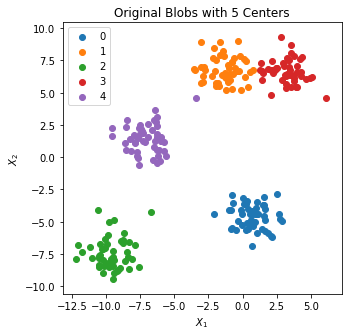

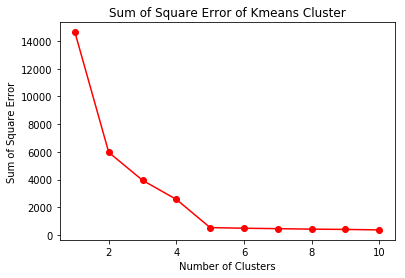

In [5]:
# 5 centers
X, y = make_blobs(n_samples=250, n_features=2, centers=5, random_state=100)
make_plot(X, y, figsize=(5, 5), title="Original Blobs with 5 Centers", xlab="$X_1$", ylab="$X_2$")

SSE = []
for k in range(1, 11):
    kmean = kmeans(k_clusters=k, random_state=10).fit(X)
    SSE.append(kmean.get_inertia(X))
plt.plot(np.arange(1, 11), SSE, '-or')
plt.title("Sum of Square Error of Kmeans Cluster")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Square Error")
plt.show()

For 5 centers, the elbow appears to be at $k=5$, because the slope (the decreasing speed of SSE) of this curve at this point is dramatically diminished. That is, the drop of the SSE from $k=4$ to $k=5$ is huge but the drop of it from $k=5$ to $k=6$ is small, and the drop stays almost constant when $k$ keep getting larger.

We could see from the plot of the original data that these data for this seed is almost perfectly seperable for classification into 5 blobs, and the distance between the centroid of each blobs are relatively large when compared to the spread of points within each blobs, so $k=5$ will be an optimal elbow. When $k$ keeps getting larger, the KMeans algorithm is overfitting the data so the drop of SSE is small and nearly constant.

**(b) Briefly explain in 1-2 sentences each (and at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering**

1. **K-means**

K-means minimize the sum of squared distance between each data point and the centroid within each cluster by implicitly assuming each cluster has the same shape and equal variance.

2. **Agglomerative Clustering**

Agglomerative clustering method creates nested clusters by merging them step by step starting form each data point is one cluster. The clusters for merging are selected by usually minimizing some metrics determined by linkage criteria.

3. **Gaussian Mixture Models**

Gaussian mixture models assume each cluster has a latent gaussian distribution (with some restriction of the covariance matrix). It tries to find the center and covariance matrix of each gaussian distribution by maximizing the expectation of generating all the data with such gaussian distributions.

4. **DBSCAN**

DBSCAN have no pre-assumed shape for clusters. It look for areas with high density as clusters seperated by areas with low density as edges.

5. **Spectral Clustering**

Spectral clustering utilize the spectrum (eigenvalues) of the similarity matrix of the data to do a dimensionality reduction on the data and find the low-dimensional embeddings of the data before applying any other clustering algorithms.

**(c) For each of the clustering algorithms in (b) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance. Plot the final result as a 4-by-5 subplot showing the performance of each method on each dataset. Which methods work best/worst on each dataset and why?**

- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

**Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.**

In [6]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture

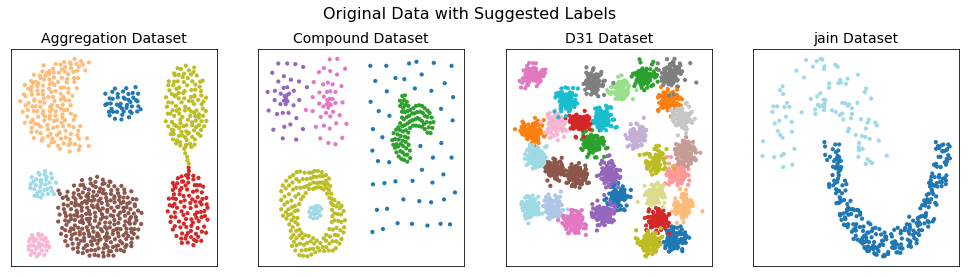

In [7]:
data_dir = ["Aggregation", "Compound", "D31", "jain"]
data = []

fig, axs = plt.subplots(1,4, figsize=(17,4))
for ax, DIR in zip(axs, data_dir):
    temp = np.loadtxt("./data/A4_" + DIR + ".txt")
    data.append(temp)
    ax.scatter(temp[:,0], temp[:,1], cmap="tab20", c=temp[:,2], s=10)
    ax.set_title(DIR + " Dataset", fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])
plt.suptitle("Original Data with Suggested Labels", y=1.025, fontsize=16)
plt.show()

In [8]:
funcs = ["KMeans", "AgglomerativeClustering", "GaussianMixture", "DBSCAN", "SpectralClustering"]
Aggregation = [
    {
        "n_clusters": 7
    },
    {
        "n_clusters": 7,
        "linkage": "average"
    },
    {
        "n_components": 7,
        "covariance_type": "full",
        "n_init": 10
    },
    {
        "eps": 2,
        "min_samples": 14
    },
    {
        "n_clusters": 7
    }
]
Compound = [
    {
        "n_clusters": 6
    },
    {
        "n_clusters": 6,
        "linkage": "ward"
    },
    {
        "n_components": 6,
        "covariance_type": "spherical",
        "n_init": 10
    },
    {
        "eps": 1,
        "min_samples": 3
    },
    {
        "n_clusters": 6
    }
]
D31 = [
    {
        "n_clusters": 31, "random_state": 0
    },
    {
        "n_clusters": 31,
        "linkage": "ward"
    },
    {
        "n_components": 31,
        "covariance_type": "spherical",
        "n_init": 10
    },
    {
        "eps": 0.4,
        "min_samples": 7
    },
    {
        "n_clusters": 31
    }
]
jain = [
    {
        "n_clusters": 2, "random_state": 0
    },
    {
        "n_clusters": 2,
        "linkage": "average"
    },
    {
        "n_components": 2,
        "covariance_type": "tied",
        "n_init": 10
    },
    {
        "eps": 2.5,
        "min_samples": 3
    },
    {
        "n_clusters": 2
    }
]
all_params = ["Aggregation", "Compound", "D31", "jain"]

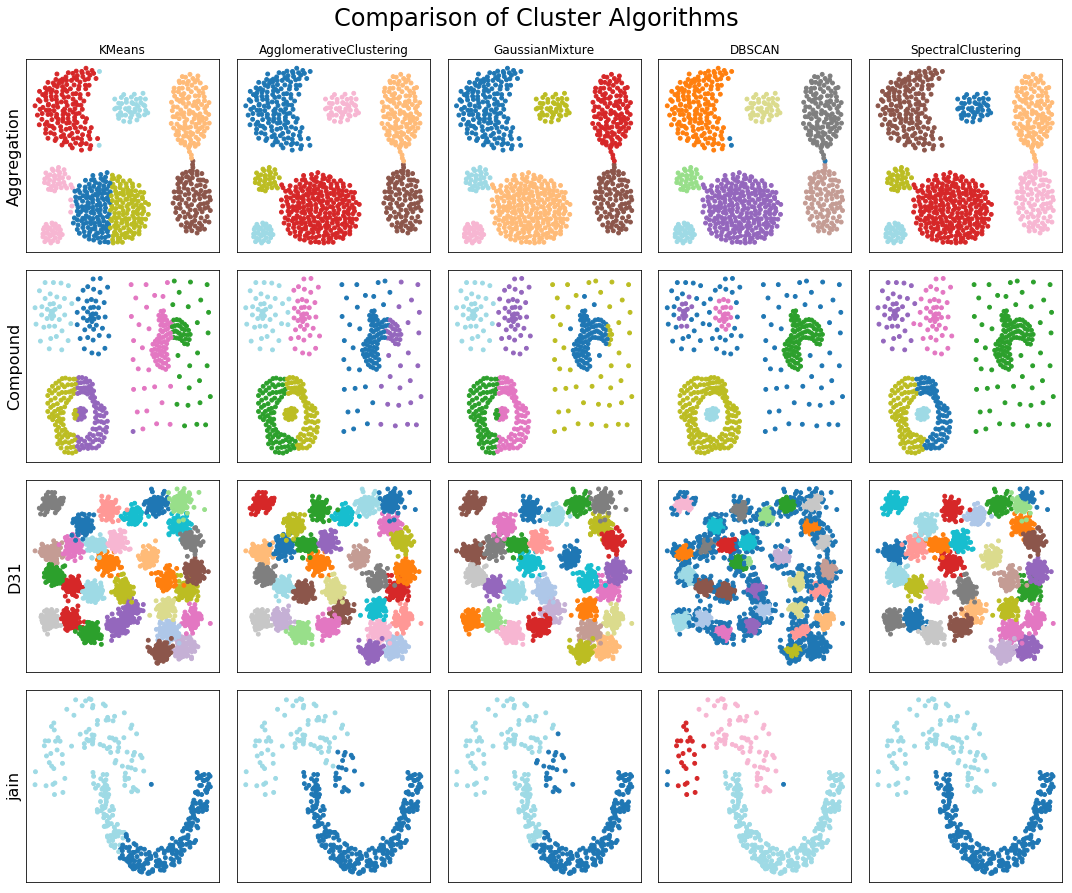

In [9]:
fig, axs = plt.subplots(4, 5, figsize=(15,12))
for ax_r, d, d_params, r in zip(axs, data, all_params, range(4)):
    for ax, func, params, c in zip(ax_r, funcs, eval(d_params), range(5)):
        result = eval(func)(**params).fit(d)
        if func == "GaussianMixture":
            labels = result.predict(d)
        else:
            labels = result.labels_
        ax.scatter(d[:, 0], d[:, 1], c=labels, cmap="tab20", s=15)
        if r == 0:
            ax.set_title(str(func), fontsize=12)
        if c == 0:
            ax.set_ylabel(d_params, fontsize=16)
        ax.set_xticks([])
        ax.set_yticks([])
plt.suptitle("Comparison of Cluster Algorithms", y=1.03, fontsize=24)
plt.tight_layout()
plt.show()

1. Aggregation

On the Aggregation dataset, Spectral Clustering (with kmeans) Agglomerative clustering and Gaussian Mixture have the almost perfect performance. The label for this dataset is determined by data points' relative positions -- closer points are in the same cluster, and each cluster has either a perfect or approximate shape of gaussian distribution. These reasons make those algorithms (as well as DBSCAN) perform well. However, these blobs have differnt deviation and differnt shape (not always a sphere), so KMeans do not perform well on it.

2. Compound

On the Compound dataset, none of these algorithms perform perfectly. The upper-left part of the data points have a ellipsoid shape and they could be perfectly seperated. Every algorithms except for DBSCAN have a perfect performance on these part of data. DBSCAN mis-labeled some points to be border points because the surrounding points are sparse. 

The labels of the bottom-left part of the data are determined by different concentric zones. Only DBSCAN perform perfectly on this part because it only cares about the density but make no assumption about the shape of the data. Others either make wrong assumptions about the shape of the clusters here (KMeans, GM), or could not successfully distinguish the clusters due to the compromised choice of hyperparameters (e.g. using "single" linkage and a larger n_clusters for Agglomerative clustering could be successful here but will be a disaster for the right part of data)

The right part of the data are also concentric, but do not have a sphere shape. Only DBSCAN works perfectly here because the density of these two clusters here are very different. Others either make wrong assumptions about the shape of the clusters here (KMeans, GM, Spectral), or could not successfully distinguish the clusters due to the compromised choice of hyperparameters (e.g. using "complete" linkage for Agglomerative clustering might perform better here but will be a disaster for the rest part of the data)

3. D31

On the D31 dataset, there are 31 blobs of data centered at different positions with almost the same sphere shape and same deviation. Therefore, KMeans, Agglomerative, Gaussian Mixture and Spectral Clustering work almost perfectly here. However, the distance between two consecutive blobs varies, and some of the two blobs have the same density for both the center part and the border part. This make DBSCAN perform not that well on this dataset.

4. Jain

On the jain dataset, there are two moons have differnt center, differnt orientation and differnt density. Only Spectral clustering works perfectly because the labels are determined by the relative positions of the data points, which will be captured by the spectrum of the similarity matrix of the data. Others either make wrong assumptions about the shape of the data (KMeans, GM) or suffer from the different density of these two blobs (DBSCAN, Agglomerative).

In [10]:
# RUBBISH ------------------------------------- DELETE ME LATOR

k = 1

km_agg = KMeans(n_clusters=2, random_state=0).fit(data[k][:,:2])
#make_plot(data[k][:,:2], km_agg.labels_, figsize=(4,4), legend=False, title="KMean")

# {"ward", "complete", "average", "single"}
ac_agg = AgglomerativeClustering(n_clusters=10, linkage="complete").fit(data[k][:,:2])
#make_plot(data[k][:,:2], ac_agg.labels_, figsize=(4,4), legend=False, title="Agglomerative")

# {'full' (default), 'tied', 'diag', 'spherical'}
gm_agg = GaussianMixture(n_components=2, covariance_type="tied", n_init=10).fit(data[k][:,:2])
#make_plot(data[k][:,:2], gm_agg.predict(data[k][:,:2]), figsize=(4,4), legend=False, title="GM")

db_agg = DBSCAN(eps=2.5, min_samples=3).fit(data[k][:,:2])
#make_plot(data[k][:,:2], db_agg.labels_, figsize=(4,4), legend=False, title="DBSCAN")

sc_agg = SpectralClustering(n_clusters=12).fit(data[k][:,:2])
#make_plot(data[k][:,:2], sc_agg.labels_, figsize=(4,4), legend=False, title="Spectral")

## 2

### [25 points] Visualizing and clustering digits with PCA and t-SNE

**(a)** Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the resulting 2-dimensional representation of the data.

**(b)** t-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/). A video introducing this method can be found [here](https://www.youtube.com/watch?v=RJVL80Gg3lA&list=UUtXKDgv1AVoG88PLl8nGXmw) for those who are interested.

*NOTE: An important note on t-SNE is that it is an example of transductive learning. This means that the lower dimensional representation of the data is only applicable to the specific input data - you can't just add a new sample an plot it in the sample 2-dimensional space without entirely rerunning the algorithm and finding a new representation of the data.*

**(c)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? Given the comparative clustering performance that you observed and the note on t-SNE above, what are the pros and cons of PCA and t-SNE? *Note: You typically will not have labels available.*

**ANSWER**

**(a) Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the resulting 2-dimensional representation of the data.**

In [11]:
from sklearn.datasets import load_digits

digits = load_digits()

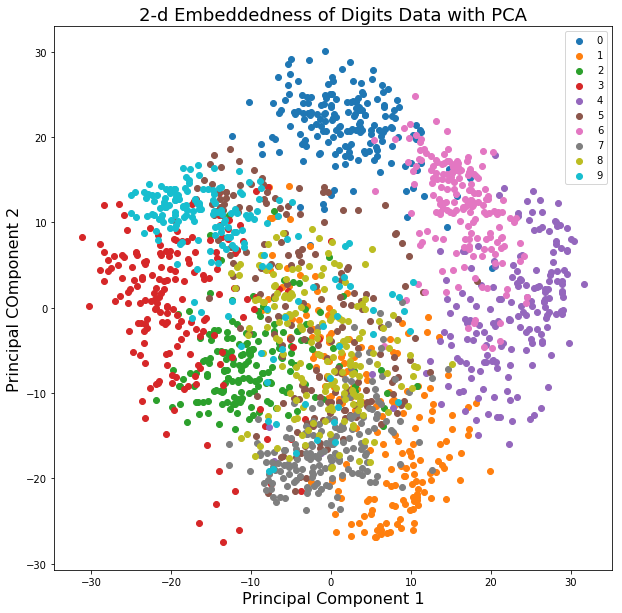

In [12]:
from sklearn.decomposition import PCA

pca =  PCA(n_components=2)
digits_pca = pca.fit_transform(digits.data)

plt.figure(figsize=(10,10))
for i in digits.target_names:
    pos = np.where(digits.target == i)
    plt.scatter(digits_pca[pos,0], digits_pca[pos,1], label=i)
plt.title("2-d Embeddedness of Digits Data with PCA", fontsize=18)
plt.xlabel("Principal Component 1", fontsize=16)
plt.ylabel("Principal COmponent 2", fontsize=16)
plt.legend()
plt.show()

**(b) t-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/). A video introducing this method can be found [here](https://www.youtube.com/watch?v=RJVL80Gg3lA&list=UUtXKDgv1AVoG88PLl8nGXmw) for those who are interested.**

*NOTE: An important note on t-SNE is that it is an example of transductive learning. This means that the lower dimensional representation of the data is only applicable to the specific input data - you can't just add a new sample an plot it in the sample 2-dimensional space without entirely rerunning the algorithm and finding a new representation of the data.*

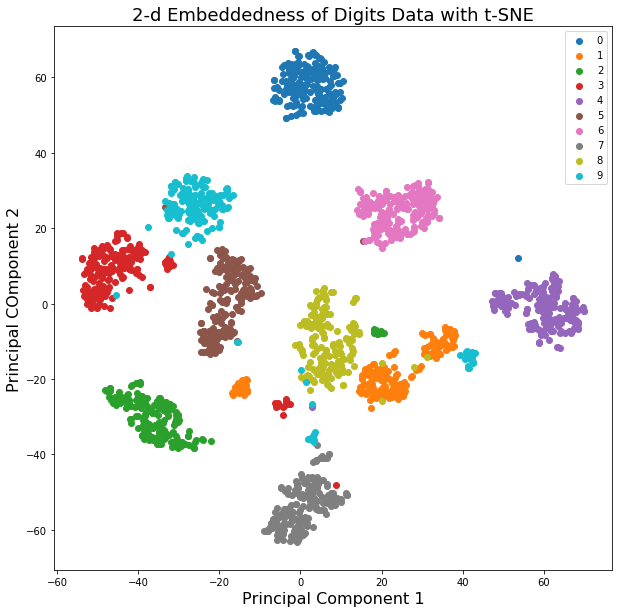

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, init="pca", random_state=0)
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10,10))
for i in digits.target_names:
    pos = np.where(digits.target == i)
    plt.scatter(digits_tsne[pos,0], digits_tsne[pos,1], label=i)
plt.title("2-d Embeddedness of Digits Data with t-SNE", fontsize=18)
plt.xlabel("Principal Component 1", fontsize=16)
plt.ylabel("Principal COmponent 2", fontsize=16)
plt.legend()
plt.show()

**(c) Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? Given the comparative clustering performance that you observed and the note on t-SNE above, what are the pros and cons of PCA and t-SNE? *Note: You typically will not have labels available.***

t-SNE seems to cluster the data better than PCA. PCA only perform a linear dimensionality reduction and only extract the linear components to project all the data on, while t-SNE perform a non-linear dimensionality reduction and could be sensitive to non-linear structure in data

**PCA** 

Pros: 

- Fast and computationally simple

- Computationally stable -- same result for differnt runs

- Not a transductive learning method -- no need to rerun the model when new data comes in

- Not that sensitive to the choice of hyperparameter

Cons: 

- Hard to be scaled to large dataset with memory complexity $O(np)$

- Only capable of linear dimensionality reduction

- Low dimensional embededness might have huge overlapped when non-linear structure exist

**t-SNE**

Pros: 

- Capable of non-linear dimensionality reduction

- Very good at seperating data on low dimensional embededness

Cons: 

- Computationally slow

- Computationally unstable -- different results for different runs

- Transductive learning method -- need to rerun the model when new data comes in

- Hard to be scaled to large dataset

- "Barnes-Hut" optimization could only be applied to less than 3 target dimensionality

- Sometimes sensitive to the choice of hyperparameters

## 3

### [30 points] PCA for compression

From the digits dataset, extract all the 5's. Your going to create a compressed version of one of an image.

**(a)** Plot a number of examples of the original images.

**(b)** Perform PCA on the data. Create a plot showing the fraction of variance explained as you incorporate from $1$ to $N$ components. 

**(c)** Select an image (from your dataset of 5's) that you will "compress" using PCA. Use the principal components extracted in (b) for data compression: choose the top $k$ principal components and represent the data using a subset of the total principal components. Plot the original image, and compressed versions with different levels of compression (i.e. using different numbers of the top principal components): use $k=1,5,10,25$.

**(d)** How many principal components are required to well-approximate the data in (c)? How much compression is achieved in each case (express compression as the ratio of $k$ to the original dimension of the data $D$, so it ranges from $0$ to $1$). Comment on each case.

**ANSWER**

**(a) Plot a number of examples of the original images.**

In [14]:
digits_5 = digits.data[digits.target == 5,:]

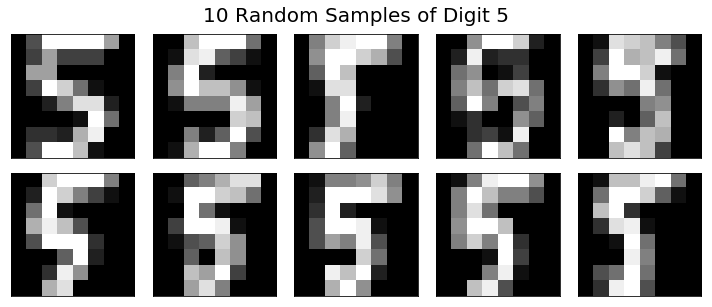

In [15]:
r = np.random.choice(digits_5.shape[0], 10, replace=False)
fig, axs = plt.subplots(2,5, figsize=(10,4))
for ax, k in zip(axs.flatten(), r):
    ax.imshow(digits_5[k].reshape(8,8), cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
plt.suptitle("10 Random Samples of Digit 5", y=1.05, fontsize=20)
plt.tight_layout()
plt.show()

**(b) Perform PCA on the data. Create a plot showing the fraction of variance explained as you incorporate from $1$ to $N$ components.**

In [16]:
N = 64
var_explained = []
for p in range(1, N+1):
    pca_5 = PCA(n_components=p)
    digits_5_pca = pca_5.fit_transform(digits_5)
    var_explained.append(np.sum(pca_5.explained_variance_ratio_))

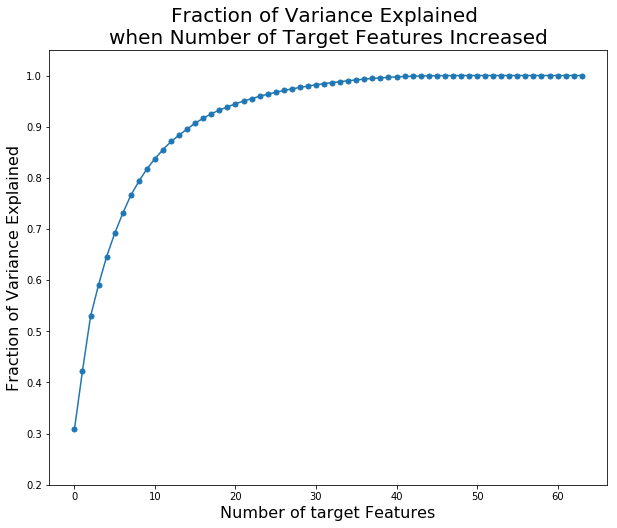

In [17]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(N), var_explained, '-o', markersize=5)
plt.ylim((0.2,1.05))
plt.title("Fraction of Variance Explained \nwhen Number of Target Features Increased", fontsize=20)
plt.xlabel("Number of target Features", fontsize=16)
plt.ylabel("Fraction of Variance Explained", fontsize=16)
plt.show()

**(c) Select an image (from your dataset of 5's) that you will "compress" using PCA. Use the principal components extracted in (b) for data compression: choose the top $k$ principal components and represent the data using a subset of the total principal components. Plot the original image, and compressed versions with different levels of compression (i.e. using different numbers of the top principal components): use $k=1,5,10,25$.**

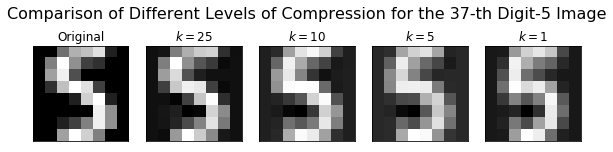

In [18]:
np.random.seed(1)
im_i = np.random.randint(digits_5.shape[0])

fig, axs = plt.subplots(1,5, figsize=(8,2))
for ax, k in zip(axs.flatten(), [0, 25, 10, 5, 1]):
    if k != 0:
        pca_5 = PCA(n_components=k)
        digits_5_pca = pca_5.fit_transform(digits_5)
        digits_5_pca_inv = pca_5.inverse_transform(digits_5_pca)
        im = digits_5_pca_inv[im_i]
        title = "$k=%d$" % k
    elif k == 0:
        im = digits_5[im_i]
        title = "Original"

    ax.imshow(im.reshape(8,8), cmap="gray")
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
plt.suptitle("Comparison of Different Levels of Compression for the %d-th Digit-5 Image" % im_i, y=1.1, fontsize=16)
plt.tight_layout()
plt.show()
    

**(d) How many principal components are required to well-approximate the data in (c)? How much compression is achieved in each case (express compression as the ratio of $k$ to the original dimension of the data $D$, so it ranges from $0$ to $1$). Comment on each case.**

The best choice of compression rate (or $k$) highly depends on the target of compression. If keeping the original images (at least visually similar) is the most important target, then a smaller compression rate (larger $k$, such as $k=25$) might be preferred. On the other hand, if saving as much as memory space as possible is the most crucial target, then a higher compression rate (smaller $k$, such as $k=5$) might be better.

When $k=25$, the compression rate is $\frac{N-k}{N} = 60.9375\,\%$. At this level, the images are visually the same to the original image, except for the background becomming a little bit brighter.

When $k=10$, the compression rate is $\frac{N-k}{N} = 84.375\,\%$. At this level, the images are visually similar to the original image. The background is even brighter than the level of $k=25$.

When $k=5$, the compression rate is $\frac{N-k}{N} = 92.1875\,\%$. At this level, the images looks like a blurry version of the original image. The background of it are brighter than the level of $k=10$.

When $k=1$, the compression rate is $\frac{N-k}{N} = 98.4375\,\%$. At this level, the images are even blurrier than the level of $k=5$, and the background is also brighter as well.

## 4

### [15 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

**(b)** Create a training and test dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset. Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one, and the test data on the other. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve.

**(c)** Suggest at least two ways in which you neural network implementation could be improved.

**ANSWER**

**(a) Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.**

In [19]:
import numpy as np

class NNClassifier():
    
    def __init__(self, hidden_layer_sizes=(5,5), n_output_node=1, batch_size=1, activation="Sigmoid",
                 loss="MSE", optimizer="SGD", shuffle=True, epoch=5, lr=0.00001, random_state=0):
        '''
        hidden_layer_sizes   - hidden layer size for each layer
        batch_size           - batch size for each optimization
        activation           - list of activation unit for each layer, string for all
        optimizer            - method for optimization
        
        '''
        self.hidden_layer_sizes = hidden_layer_sizes
        self.n_output_node = n_output_node
        self.batch_size = batch_size
        self.loss = loss
        self.optimizer = optimizer
        self.shuffle = shuffle
        self.epoch = epoch
        self.lr = lr
        np.random.seed(random_state)
        
        if optimizer == "SGD":
            assert batch_size == 1, "Wrong batch_size for SGD"
        if type(activation) == list:
            assert len(activation) == len(hidden_layer_sizes) + 1, "Wrong activation length"
            self.activation = activation
        elif type(activation) == str:
            self.activation = [activation] * (len(hidden_layer_sizes) + 1)
        else:
            raise ValueError("Wrong input activation type")    
    
    
    def fit(self, X, y):
        '''
        X - input data with shape (n, p)
        y - input label with shape  (n,)
        '''
        # Check Input
        assert X.shape[0] == y.shape[0], "Wrong input shape"
        assert self.n_output_node == len(np.unique(y)) or (self.n_output_node == 1 and len(np.unique(y)) == 2), "Wrong output_node"
        
        # Initialization
        print("=" + " START FITTING " + "=", end="\n\n")
        self.n_input_node = X.shape[1]
        self.init_nn_structure()
        print("NN structure \n", self.nn_structure)
        if self.n_output_node > 1:
            y, self.decoding_dict = self.one_hot_encoding(y)
        self.init_nn_params()
        
        # Batch Generation
        batch_index = self.generate_batches_index(y.shape[0])
        
        # Fit Epoch
        for i in range(self.epoch):
            C_all = []
            for batch in batch_index:
                batch_X = X[batch, :]
                batch_y = y[batch].reshape(self.batch_size,-1)
            
                self.Weight, self.Bias, C = NNClassifier.fit_one_batch(batch_X=batch_X.T, batch_y=batch_y.T,
                                                                       Weight=self.Weight, Bias=self.Bias,
                                                                       activation=self.activation,
                                                                       loss=self.loss, lr=self.lr)
                C_all.append(C)
            if i % 100 == 0:
                print(">"*10 + "  Training epoch %d - " % i)
                print("Training Error: %10.4f" % np.mean(C_all))
        
        return self


    ## initiate structure dictionary
    def init_nn_structure(self):
        layer_sizes = [self.n_input_node] + list(self.hidden_layer_sizes) + [self.n_output_node]
        nn_structure = []
        for in_layer, out_layer, cur_activ in zip(layer_sizes[:-1], layer_sizes[1:], self.activation):
            layer_structure = {
                "n_input": in_layer,
                "n_output": out_layer,
                "activ": cur_activ
            }
            nn_structure.append(layer_structure)
        self.nn_structure = nn_structure

    
    def init_nn_params(self):
        Weight = []
        Bias = []
        for layer in self.nn_structure:
            w = np.random.uniform(-1, 1,(layer["n_output"], layer["n_input"]))
            b = np.random.uniform(-1,1, layer["n_output"])
            Weight.append(w)
            Bias.append(b)
        self.Weight = Weight
        self.Bias = Bias
    

    def one_hot_encoding(self, y):
        encoding_dict = {}
        decoding_dict = {}
        for i, l in enumerate(np.unique(y)):
            encoding_dict[str(l)] = i
            decoding_dict[i] = str(l)
        one_hot = np.zeros((y.shape[0], self.n_output_node))
        print(list(range(y.shape[0])))
        print([encoding_dict[str(j)] for j in y])
        print(one_hot)
        one_hot[list(range(y.shape[0])), [encoding_dict[str(j)] for j in y]] = np.ones(y.shape[0])
        return one_hot, decoding_dict

    
    def generate_batches_index(self, n):
        n_more = self.batch_size-n%self.batch_size
        batch_index = np.concatenate((np.arange(n), np.random.choice(n, n_more, replace=False)))
        if self.shuffle:
            np.random.shuffle(batch_index)
        return batch_index.reshape(-1, self.batch_size)
        
    
    @classmethod
    def fit_one_batch(cls, batch_X, batch_y, Weight, Bias, activation, loss, lr):
        '''
        Weights  - list of all the weights with length hidden_layer_sizes + 1
        Bias     - list of all the bias with length
        batch_X  - one batch of training data with shape (input_node, batch_size)
        batch_y  - one batch of training label with shape (output_node, batch_size)
        '''
        # Check Input
        assert len(Weight) == len(Bias) == len(activation), "Wrong W/B shape"
        assert batch_X.shape[1] == batch_y.shape[1]
        
        # Initialization
        batch_size = batch_X.shape[1]
        Y = []
        Z = [batch_X]
        C = 0
        dW = []
        dB = []
        
        # Forward Propagation
        for weight, bias, activ in zip(Weight, Bias, activation):
            x_in = Z[-1]
            y, z = cls.feed_forward_one(x_in, weight, bias, activ)
            Y.append(y)
            Z.append(z)
        C = cls.cost_function(batch_y=batch_y, output_y=Z[-1], loss=loss)

        # Backward Propagation
        dy = cls.cost_function(batch_y=batch_y, output_y=Z[-1], loss=loss, d=True) * eval(activation[-1])(Y[-1], d=True)
        dw = dy @ Z[-2].T / batch_size
        db = np.mean(dy, axis=1)
        dW.append(dw)
        dB.append(db)
        for i in range(2, len(Weight)+1):
            w = Weight[-i+1]
            y = Y[-i]
            z = Z[-i-1]
            activ = activation[-i]
            dw, db, dy = cls.feed_backward_one(dy, w, y, z, activ, batch_size)
            dW.append(dw)
            dB.append(db)
                
        # Update Weigths
        Weight_new = cls.update_params(Weight, dW[::-1], lr)
        Bias_new = cls.update_params(Bias, dB[::-1], lr)
        
        return Weight_new, Bias_new, C


    ## cost function
    @classmethod
    def cost_function(cls, batch_y, output_y, loss="cross_entropy", d=False):
        assert type(d) == bool
        if loss == "cross_entropy":
            if not d:
                return -np.sum(batch_y * np.log(output_y)) / batch_y.shape[1]
            else:
                return np.divide(1-batch_y, 1-output_y) - np.divide(batch_y, output_y)
        elif loss == "MSE":
            if not d:
                return np.mean((batch_y - output_y)**2)
            else:
                return 2 * (output_y - batch_y)
    
    
    ## feed one step forward
    @classmethod
    def feed_forward_one(cls, x, w, b, activ):
        y = w @ x + np.tile(b, (x.shape[1],1)).T
        z = eval(activ)(y)
        return y, z
    
    @classmethod
    def feed_backward_one(cls, dy, w, y, z, activ, batch_size):
        dy_new = (w.T @ dy) * eval(activ)(y, d=True)
        dw = dy_new @ z.T / batch_size
        db = np.mean(dy_new, axis=1)
        
        return dw, db, dy_new
    
    @classmethod
    def update_params(cls, P, dP, lr):
        return [p - lr * dp for p, dp in zip(P, dP)]
    
    def predict(self, X, thres=0.5):
        y_hat = self.predict_proba(X)
        y_hat_class = np.zeros(X.shape[0])
        y_hat_class[y_hat > thres] = 1
        return y_hat_class
    
    def predict_proba(self, X):
        x_in = X.T
        # Forward Propagation
        for weight, bias, activ in zip(self.Weight, self.Bias, self.activation):
            #print("weight:\n",weight)
            #print("bias:\n",bias)
            y, z = NNClassifier.feed_forward_one(x_in, weight, bias, activ)
            x_in = z
        #C = cls.cost_function(batch_y=batch_y, output_y=z, loss=loss)
        return z.flatten()
    
## activation function ReLu
def ReLu(y, d=False):
    assert type(d) == bool
    if not d:
        return np.maximum(0, y)
    else:
        dy = np.zeros_like(y)
        dy[y>0] = 1
        return dy


## activation function Sigmoid
def Sigmoid(y, d=False):
    assert type(d) == bool
    sig = 1/(1+np.exp(-y))
    if not d:
        return sig
    else:
        return sig * (1 - sig)

**(b) Create a training and test dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset. Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one, and the test data on the other. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve.**

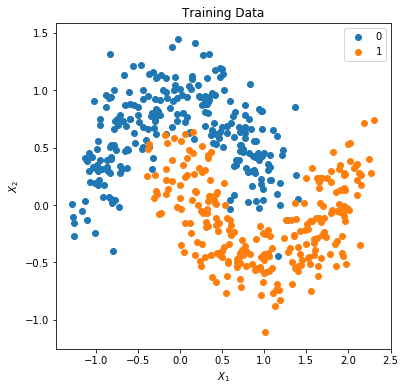

In [20]:
from sklearn.datasets import make_moons
np.random.seed(0)
N_train = 500
N_test = 100

data_train = make_moons(N_train, noise=0.2)
data_test = make_moons(N_test, noise=0.2)

pos0 = np.where(data_train[1] == 0)
pos1 = np.where(data_train[1] == 1)
plt.figure(figsize=(6,6))
plt.scatter(data_train[0][pos0,0], data_train[0][pos0,1], label=0)
plt.scatter(data_train[0][pos1,0], data_train[0][pos1,1], label=1)
plt.legend()
plt.title("Training Data")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [21]:
nnc = NNClassifier(epoch=5000, lr=0.001, random_state=10).fit(data_train[0], data_train[1])
train_y_hat = nnc.predict_proba(data_train[0])
train_y_class = nnc.predict(data_train[0], thres=np.median(train_y_hat))
test_y_hat = nnc.predict_proba(data_test[0])
test_y_class = nnc.predict(data_test[0], thres=np.median(test_y_hat))

= START FITTING =

NN structure 
 [{'n_input': 2, 'n_output': 5, 'activ': 'Sigmoid'}, {'n_input': 5, 'n_output': 5, 'activ': 'Sigmoid'}, {'n_input': 5, 'n_output': 1, 'activ': 'Sigmoid'}]
>>>>>>>>>>  Training epoch 0 - 
Training Error:     0.2599
>>>>>>>>>>  Training epoch 100 - 
Training Error:     0.2443
>>>>>>>>>>  Training epoch 200 - 
Training Error:     0.2214
>>>>>>>>>>  Training epoch 300 - 
Training Error:     0.1643
>>>>>>>>>>  Training epoch 400 - 
Training Error:     0.1210
>>>>>>>>>>  Training epoch 500 - 
Training Error:     0.1048
>>>>>>>>>>  Training epoch 600 - 
Training Error:     0.0985
>>>>>>>>>>  Training epoch 700 - 
Training Error:     0.0960
>>>>>>>>>>  Training epoch 800 - 
Training Error:     0.0949
>>>>>>>>>>  Training epoch 900 - 
Training Error:     0.0944
>>>>>>>>>>  Training epoch 1000 - 
Training Error:     0.0942
>>>>>>>>>>  Training epoch 1100 - 
Training Error:     0.0940
>>>>>>>>>>  Training epoch 1200 - 
Training Error:     0.0939
>>>>>>>>>>  Traini

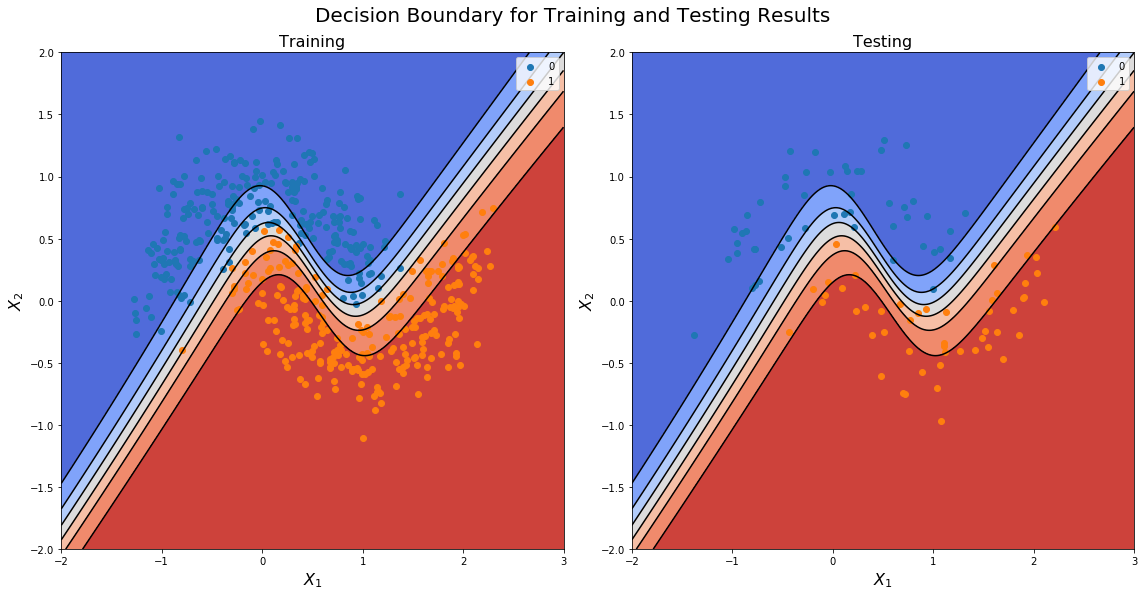

In [22]:
from matplotlib import cm

N_grid = 501
grid_x = np.linspace(-2, 3, N_grid)
grid_y = np.linspace(-2, 2, N_grid)
XX, YY = np.meshgrid(grid_x, grid_y)
x_pre = np.stack((XX.flatten(), YY.flatten()), axis = -1)
y_pre = nnc.predict_proba(x_pre).reshape(N_grid, N_grid)

fig, axs = plt.subplots(1,2, figsize=(16,8))
ax = axs.flatten()

pos0 = np.where(train_y_class == 0)
pos1 = np.where(train_y_class == 1)
cset = ax[0].contourf(XX, YY, y_pre, cmap=cm.coolwarm)
ax[0].contour(cset, colors = 'k')
ax[0].scatter(data_train[0][pos0,0], data_train[0][pos0,1], label=0)
ax[0].scatter(data_train[0][pos1,0], data_train[0][pos1,1], label=1)
ax[0].set_title("Training", fontsize=16)
ax[0].set_xlabel("$X_1$", fontsize=16)
ax[0].set_ylabel("$X_2$", fontsize=16)
ax[0].legend()

pos0 = np.where(test_y_class == 0)
pos1 = np.where(test_y_class == 1)
cset = ax[1].contourf(XX, YY, y_pre, cmap=cm.coolwarm)
ax[1].contour(cset, colors = 'k')
ax[1].scatter(data_test[0][pos0,0], data_test[0][pos0,1], label=0)
ax[1].scatter(data_test[0][pos1,0], data_test[0][pos1,1], label=1)
ax[1].set_title("Testing", fontsize=16)
ax[1].set_xlabel("$X_1$", fontsize=16)
ax[1].set_ylabel("$X_2$", fontsize=16)
ax[1].legend()

plt.suptitle("Decision Boundary for Training and Testing Results", y=1.03, fontsize=20)
plt.tight_layout()
plt.show()

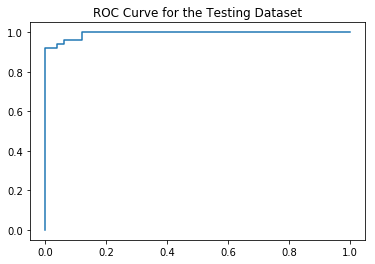

In [23]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(data_test[1], test_y_hat, pos_label=1)

plt.plot(fpr, tpr)
plt.title("ROC Curve for the Testing Dataset")
plt.show()

**(c) Suggest at least two ways in which you neural network implementation could be improved.**

1. I could have implemented a multiclass classifier, by changing the number of output nodes and applying a softmax function right after the output.

2. I only implemented a SGD optimizer and only use a batch_size of 1. Using a larger batch_size could speed up the training process.

3. The computation speed is still slow